In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import sklearn

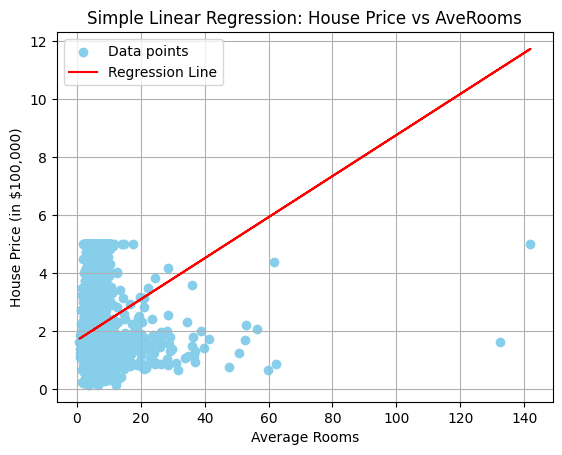

In [29]:
# Task 1 : Simple Linear Regression

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_rooms = X[['AveRooms']]

model = LinearRegression()
model.fit(X_rooms, y)

plt.scatter(X_rooms, y, color='skyblue', label='Data points')
plt.plot(X_rooms, model.predict(X_rooms), color='red', label='Regression Line')
plt.xlabel('Average Rooms')
plt.ylabel('House Price (in $100,000)')
plt.title('Simple Linear Regression: House Price vs AveRooms')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Task 2: Multiple Linear Regression

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
X_multi = X[features]

multi_model = LinearRegression()
multi_model.fit(X_multi, y)
y_pred = multi_model.predict(X_multi)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print("Multiple Linear Regression Evaluation:")
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")

print("Feature Coefficients:")
for feature, coef in zip(features, multi_model.coef_):
    print(f"{feature}: {coef:.4f}")


Multiple Linear Regression Evaluation:
R-squared: 0.5137
Mean Squared Error (MSE): 0.6475
Root Mean Squared Error (RMSE): 0.8047

Feature Coefficients:
MedInc: 0.4433
AveRooms: -0.0273
AveOccup: -0.0045
HouseAge: 0.0169


In [34]:
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
X_selected = X[features]

model_raw = LinearRegression()
model_raw.fit(X_selected, y)
y_pred_raw = model_raw.predict(X_selected)

r2_raw = r2_score(y, y_pred_raw)
mse_raw = mean_squared_error(y, y_pred_raw)
rmse_raw = np.sqrt(mse_raw)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)
y_pred_scaled = model_scaled.predict(X_scaled)

r2_scaled = r2_score(y, y_pred_scaled)
mse_scaled = mean_squared_error(y, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

print("Model Performance Before Scaling:")
print(f"R-squared: {r2_raw:.4f}")
print(f"RMSE     : {rmse_raw:.4f}")

print("\nModel Performance After Scaling:")
print(f"R-squared: {r2_scaled:.4f}")
print(f"RMSE     : {rmse_scaled:.4f}")

print("\nRaw Coefficients:")
for feature, coef in zip(features, model_raw.coef_):
    print(f"{feature}: {coef:.4f}")

print("\nScaled Coefficients (Standardized):")
for feature, coef in zip(features, model_scaled.coef_):
    print(f"{feature}: {coef:.4f}")

Model Performance Before Scaling:
R-squared: 0.5137
RMSE     : 0.8047

Model Performance After Scaling:
R-squared: 0.5137
RMSE     : 0.8047

Raw Coefficients:
MedInc: 0.4433
AveRooms: -0.0273
AveOccup: -0.0045
HouseAge: 0.0169

Scaled Coefficients (Standardized):
MedInc: 0.8423
AveRooms: -0.0677
AveOccup: -0.0463
HouseAge: 0.2124


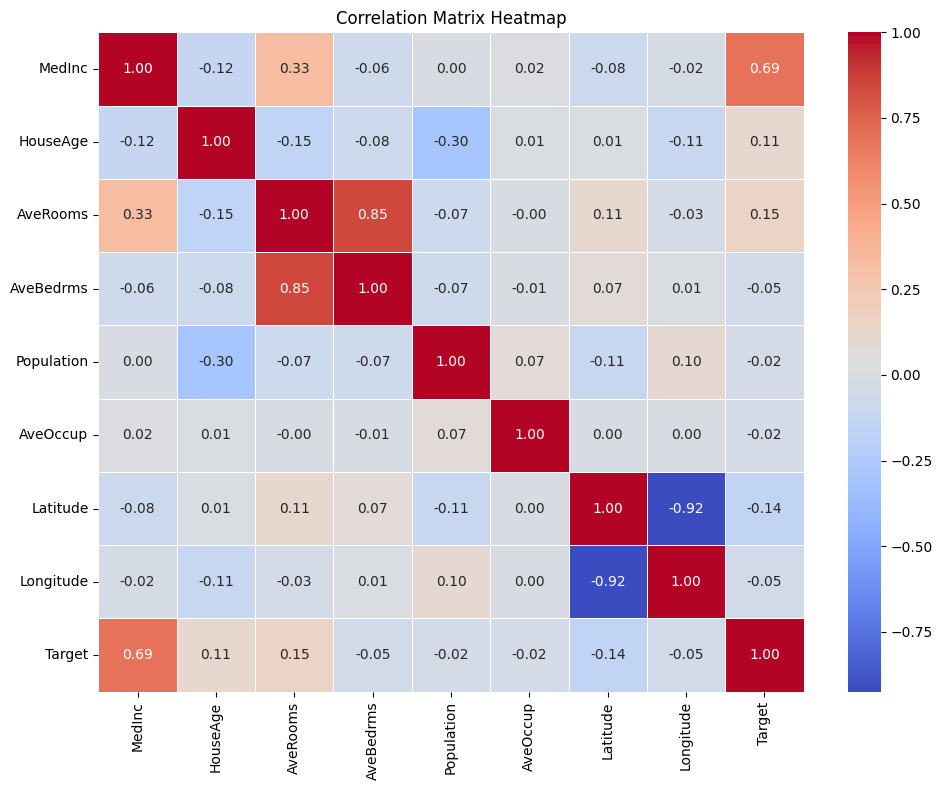


Features most correlated with the target:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Target, dtype: float64


In [36]:
import seaborn as sns

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

cor_target = correlation_matrix['Target'].drop('Target').sort_values(ascending=False)
print("\nFeatures most correlated with the target:")
print(cor_target)


<h1 align="center">Linear Regression</h1>
<h3 align="center">THE END</h3>